# Linear Regression

### In this notebook we attempt to solve Linear Regression with 

1. Gradient Descent 
2. Ordinary Least Squares 

### Read the data

In [1]:
df = pd.read_csv("housing.csv")

In [2]:
import seaborn as sns

In [3]:
## Scale median income 
df.median_income = df.median_income * 10000

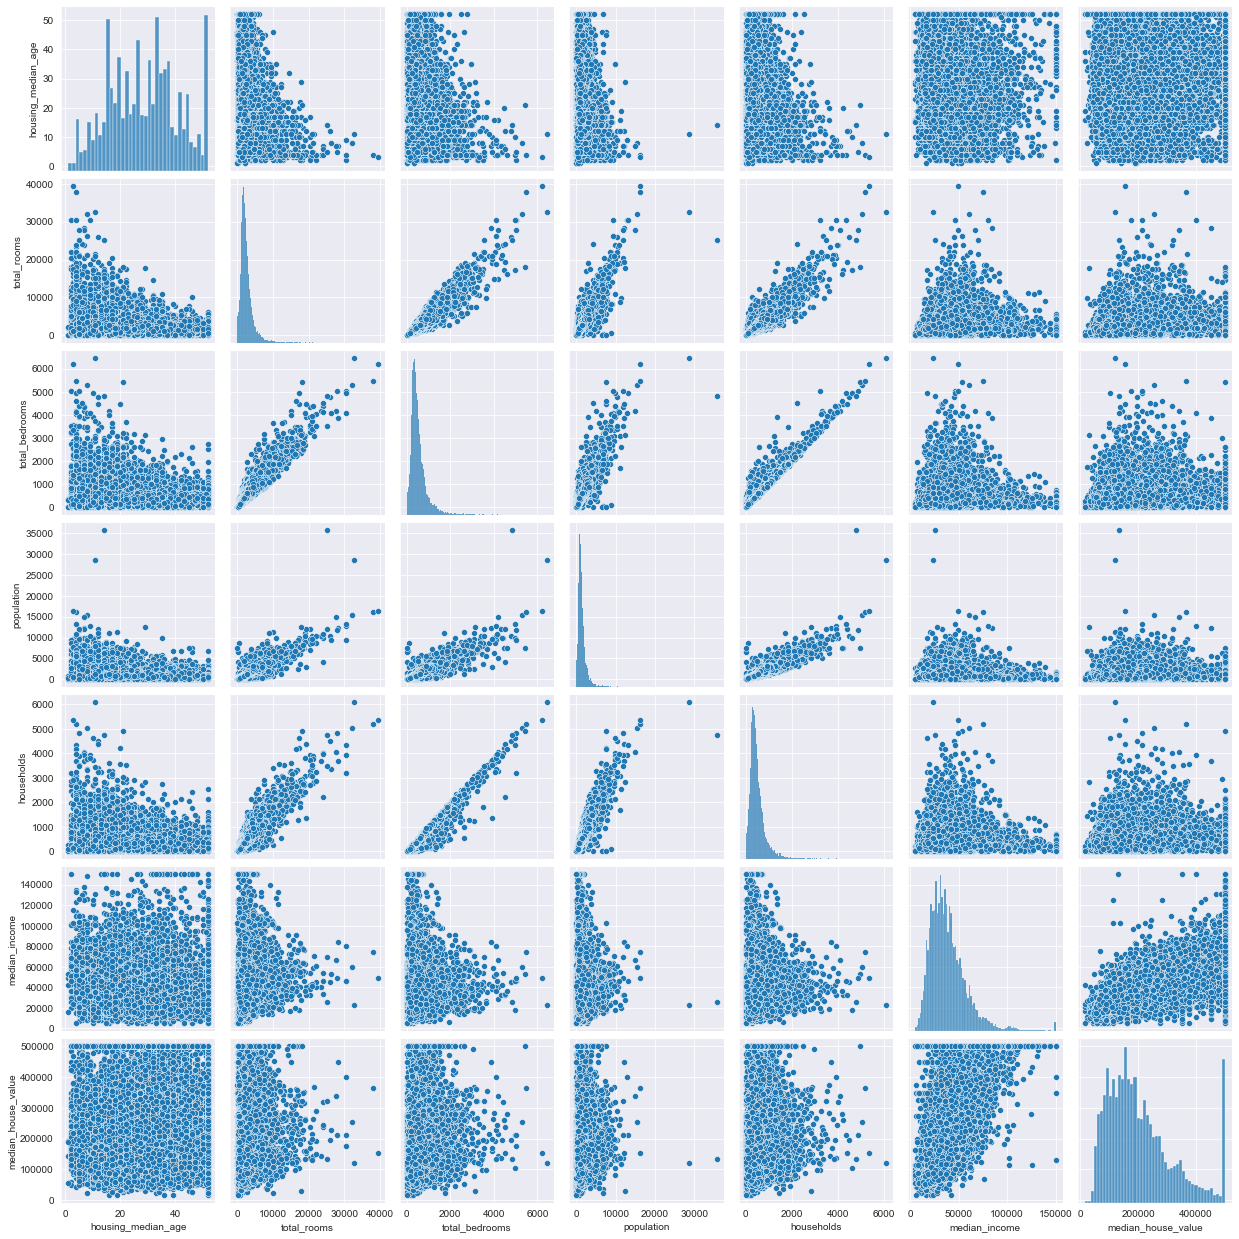

In [4]:
## Rough viz of what has correlations
sns.set_style('darkgrid')
sns.pairplot(df.drop(columns = ['longitude', 'latitude']))

In [186]:
data = df[['median_income', 'median_house_value']]

In [187]:
#Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...
x = data['median_income'].values
y = data['median_house_value'].values

# Linear Regression Solution with Gradient Descent

### The equation for the line 

$y$ = $mx$ + $b$

### In order to perform LR with Gradient Descent, we first find the cost function derivative 

The cost function provides us with a comparison metric of our predicted values against the actual values. For our cost function, we use Mean Squared Error (MSE), defined as: 

$\epsilon$ = $\frac{1}{n}$	$\sum_{i=0}^{n} (y_i - \hat{y})^2 $	where $\hat{y}$ is the predicted value and $y_i$ is the actual value 

##### We can substitute $\hat{y}$ with our line equation $\hat{y}$ = $m\hat{x}$ + $b$
To get: 

$\epsilon$ = $\frac{1}{n}$	$\sum_{i=0}^{n} (y_i - (m \cdot x_i + b))^2 $	

### We now want to minimize the error, $\epsilon$
So, we find the partial derivatives of $\epsilon$ with respect to $m$ and $b$ respectively (as these are the two independent variables)


$\epsilon$ = $\frac{1}{n}$	$\sum_{i=0}^{n} (y_i - (m \cdot x_i + b))^2 $	


For $\frac{\delta\epsilon}{\delta m}$:

$\frac{\delta\epsilon}{\delta m}$ = $\frac{1}{n}$ $\sum_{i=0}^{n} 2 \cdot (y_i - (m \cdot x_i + b)) \cdot (-x_i) $

Simplifying, we get: 

$\frac{\delta\epsilon}{\delta m}$ = - $\frac{2}{n}$ $\sum_{i=0}^{n} x_i \cdot (y_i - (m \cdot x_i + b)) $

And for $\frac{\delta\epsilon}{\delta b}$:

$\frac{\delta\epsilon}{\delta b}$ =  - $\frac{2}{n}$  $\sum_{i=0}^{n}  (y_i - (m \cdot x_i + b)) $

### Then we will correct our $m$, $b$ according to these derivatives, with an attached learning rate 

Learning rate ($\alpha$) controls how much we are adjusting the weights of our line with respect the cost fn gradient. 
We set a learning rate to get a better estimate of the minimum error

$m$ = $m$ - $\alpha \cdot \frac{\delta\epsilon}{\delta m}$

$b$ = $b$ - $\alpha \cdot \frac{\delta\epsilon}{\delta b}$

**We do not solve the problems of exploding or shrinking gradients here, is merely a simple vanilla implementation of gradient descent**

In [188]:
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

In [189]:
m, b = np.random.rand(2)
epochs = 500
lr = 0.005

In [190]:
def gradient_descent(m, b, x, y, lr):
    
    error = y - (m * x + b)
    cost = np.dot(error.T, error)
    
    eps_m = (- 2 / x.shape[0] ) * np.dot(x.T, error)
    eps_b = (- 2 / x.shape[0] ) * error.sum()

    m_new, b_new = 0,0 
    
    m_new = m - eps_m * lr
    b_new = b - eps_b * lr 

    return m_new, b_new, cost

In [191]:
for epoch in range(epochs):
    m, b, cost = gradient_descent(m, b, x, y, lr)
    if epoch % 20 == 0:
        print(f"Epoch {epoch} Cost: {cost}")

Epoch 0 Cost: 31145.402847527028
Epoch 20 Cost: 24433.024330944012
Epoch 40 Cost: 19942.632670520128
Epoch 60 Cost: 16938.687464779734
Epoch 80 Cost: 14929.132957848622
Epoch 100 Cost: 13584.797745405293
Epoch 120 Cost: 12685.475454229929
Epoch 140 Cost: 12083.854239581431
Epoch 160 Cost: 11681.386637625199
Epoch 180 Cost: 11412.147178177218
Epoch 200 Cost: 11232.033583513949
Epoch 220 Cost: 11111.54267534976
Epoch 240 Cost: 11030.9376606235
Epoch 260 Cost: 10977.015182172541
Epoch 280 Cost: 10940.942566936768
Epoch 300 Cost: 10916.811006086285
Epoch 320 Cost: 10900.667673387106
Epoch 340 Cost: 10889.868239722158
Epoch 360 Cost: 10882.643723591764
Epoch 380 Cost: 10877.8107263312
Epoch 400 Cost: 10874.577587654638
Epoch 420 Cost: 10872.414709188477
Epoch 440 Cost: 10870.967804577396
Epoch 460 Cost: 10869.99986625524
Epoch 480 Cost: 10869.352342853683


(0.6878198427986094, 0.006507497625122812)

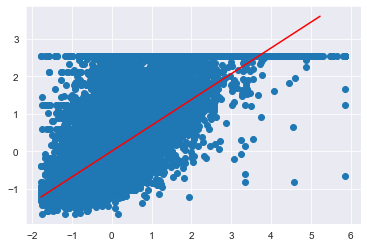

In [211]:
plt.scatter(x, y)
plt.plot(np.arange(x.min(), x.max()), m * np.arange(x.min(), x.max()) + b, color = "red")
m, b

#### How does it compare to out of the box packages?

(0.6880752079585476, 2.3851825991448447e-17)

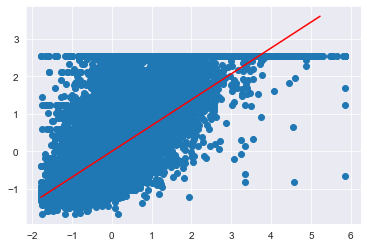

In [210]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x.reshape(-1, 1), y)
plt.scatter(x, y)
regression_plot = plt.plot(np.arange(x.min(), x.max()), reg.coef_ * np.arange(x.min(), x.max()) + reg.intercept_, color = "red")
reg.coef_[0], reg.intercept_

# Linear Regression Solution with Ordinary Least Squares (OLS)